# Introdução

    Para realizar uma análise da situação dos idosos no Brasil serão considerados dois aspectos:
    
- Renda e obtenção de auxílios (saúde, alimentação, etc.);
- Capacidade de comunicação (sabe ler ou escrever, uso de internet, etc.).

    O primeiro irá demonstrar quem possui uma maior necessidade de auxílios devido a não suficiência da renda. Ja o segundo mostra a capacidade de um idoso se informar sobre os resultados do primeiro e realizar uma reclamação/elogio dinte deste.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Diretório:')
print(os.getcwd())

Diretório:
C:\Users\trcar\Desktop\Insper\2º Semestre\Ciência dos dados\Github\Projetos\CD\Projeto1


In [3]:
estrutura = pd.read_table("pes_py.txt", sep=";")

In [4]:
estrutura.head()

,Coluna,Tamanho,Título
0,V0101,4,Ano de referência
1,UF,2,Unidade da Federação
2,V0102,6,Número de controle
3,V0103,3,Número de série
4,V0301,2,Número de ordem


In [5]:
dados = pd.read_fwf("PES2014.zip", widths=estrutura.Tamanho, header=None, compression="zip")
n = dados.shape[0]

In [6]:
dados.head()

,0,1,2,3,4,5,6,7,8,9,...,331,332,333,334,335,336,337,338,339,340
0,2014,11,15,1,1,2,19,8,1987,27,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [7]:
estrutura.columns

Index(['Coluna', 'Tamanho', 'Título'], dtype='object')

In [8]:
dados.columns = estrutura.Coluna

In [9]:
dados.head()

Coluna,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,2014,11,15,1,1,2,19,8,1987,27,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [145]:
# UF
dados.UF = dados.UF.astype('category')
dados.UF.cat.categories = ('RO','AC','AM','RR','PA','AP','TO','MA','PI','CE','RN','PB','PE','AL','SE','BA','MG','ES','RJ','SP','PR','SC','RS','MS','MT','GO','DF')

#dados.REGIAO = dados.UF


In [146]:
# Idade
dados.V8005 = dados.V8005.astype('float')


In [147]:
# Aposentados
dados.V9122 = dados.V9122.astype('category')
dados.V9122.cat.categories = ('Aposentado', 'Não_aposentado')

In [ ]:
# Sabe ler ou escrever
dados.V0601 = dados.V0601.astype('category')


In [ ]:
# Tem celular
dados.V06112 = dados.V06112.astype('category')


In [ ]:
# Acessou a internet nos últimos 12 meses
dados.V061111 = dados.V061111.astype('category')


## Tratamento de dados em relção ao auxílio recebido

### Variável Auxílio Moradia (V9043)

In [148]:
# Auxílio moradia
dados.V9043 = dados.V9043.astype('category')
dados.V9043.cat.categories = ('Sim', 'Não')

In [149]:
print('População que recebeu auxílio moradia:')
tcam=pd.crosstab(dados.V9043,dados.V9122,rownames=['Auxílio'], colnames=['Aposentado'])
tcam = tcam.fillna(0)
tcam

População que recebeu auxílio moradia:


Aposentado,Aposentado,Não_aposentado
Auxílio,,
Sim,162,4737
Não,2674,111722


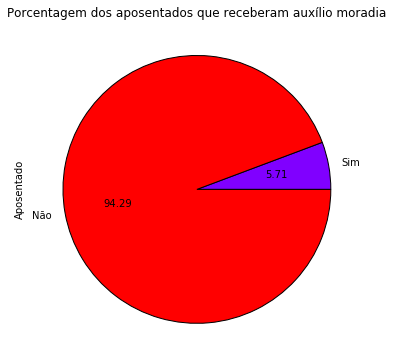

In [150]:
tcam.Aposentado.plot.pie(title= 'Porcentagem dos aposentados que receberam auxílio moradia', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

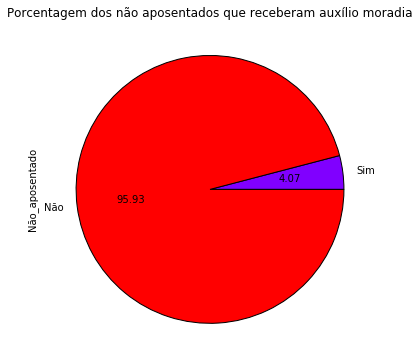

In [151]:
tcam.Não_aposentado.plot.pie(title= 'Porcentagem dos não aposentados que receberam auxílio moradia', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

    Visto essa comparação é visivel que,

### Variável Auxílio Alimentação (V9044)

In [152]:
dados.V9044 = dados.V9044.astype('category')
dados.V9044.cat.categories = ('Sim', 'Não')

In [153]:
print('População que recebeu auxílio alimentação:')
tcaa=pd.crosstab(dados.V9044,dados.V9122,rownames=['Auxílio'], colnames=['Aposentados'])
tcaa = tcaa.fillna(0)
tcaa

População que recebeu auxílio alimentação:


Aposentados,Aposentado,Não_aposentado
Auxílio,,
Sim,1136,51912
Não,1700,64547


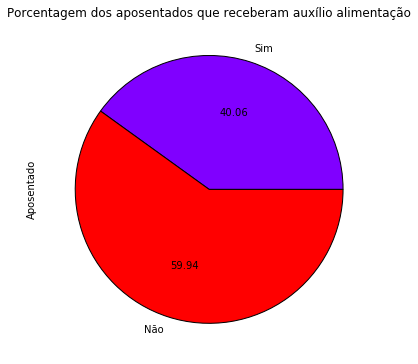

In [154]:
tcaa.Aposentado.plot.pie(title= 'Porcentagem dos aposentados que receberam auxílio alimentação', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

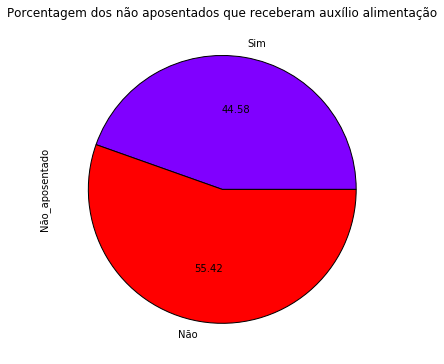

In [155]:
tcaa.Não_aposentado.plot.pie(title= 'Porcentagem dos não aposentados que receberam auxílio alimentação', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

    Ja de acordo com os resultados relevantes ao auxílio alimentação,

### Variável Auxílio Transporte (V9045)

In [156]:
dados.V9045 = dados.V9045.astype('category')
dados.V9045.cat.categories = ('Sim', 'Não')

In [157]:
print('População que recebeu auxílio transporte:')
tcat=pd.crosstab(dados.V9045,dados.V9122,rownames=['Auxílio'], colnames=['Aposentados'])
tcat = tcat.fillna(0)
tcat

População que recebeu auxílio transporte:


Aposentados,Aposentado,Não_aposentado
Auxílio,,
Sim,828,47880
Não,2008,68579


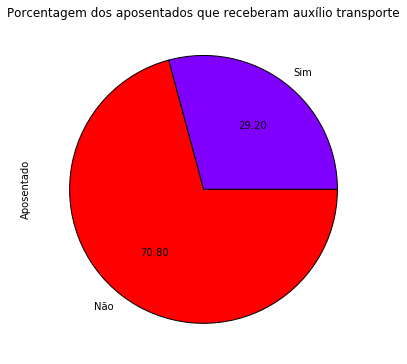

In [158]:
tcat.Aposentado.plot.pie(title= 'Porcentagem dos aposentados que receberam auxílio transporte', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

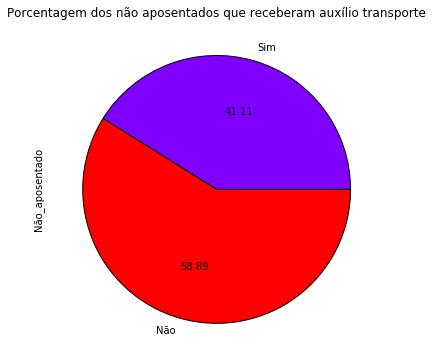

In [159]:
tcat.Não_aposentado.plot.pie(title= 'Porcentagem dos não aposentados que receberam auxílio transporte', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

    A variável auxílio transporte revela que,

### Variável Auxílio Educação (V9046)

In [160]:
dados.V9046 = dados.V9046.astype('category')
dados.V9046.cat.categories = ('Sim', 'Não')

In [161]:
print('População que recebeu auxílio educação:')
tcae=pd.crosstab(dados.V9046,dados.V9122,rownames=['Auxílio'], colnames=['Aposentados'])
tcae = tcae.fillna(0)
tcae

População que recebeu auxílio educação:


Aposentados,Aposentado,Não_aposentado
Auxílio,,
Sim,828,47880
Não,2008,68579


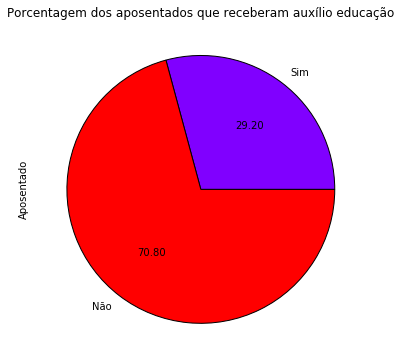

In [144]:
tcae.Aposentado.plot.pie(title= 'Porcentagem dos aposentados que receberam auxílio educação', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

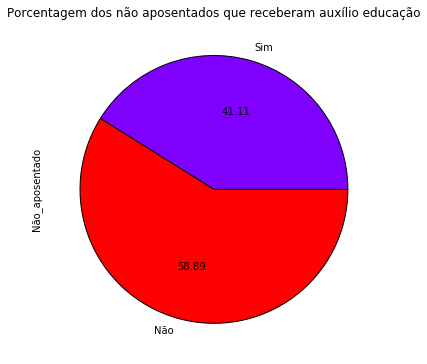

In [169]:
tcae.Não_aposentado.plot.pie(title= 'Porcentagem dos não aposentados que receberam auxílio educação', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

    A variável auxílio educaçaõ nos mostra que

### Variável Auxílio Saúde (V9047)

In [166]:
# Auxílio saúde
dados.V9047 = dados.V9047.astype('category')
dados.V9047.cat.categories = ('Sim', 'Não')

In [167]:
print('População que recebeu auxílio saúde:')
tcas=pd.crosstab(dados.V9047,dados.V9122,rownames=['Auxílio'], colnames=['Aposentados'])
tcas = tcas.fillna(0)
tcas

População que recebeu auxílio saúde:


Aposentados,Aposentado,Não_aposentado
Auxílio,,
Sim,591,21864
Não,2245,94595


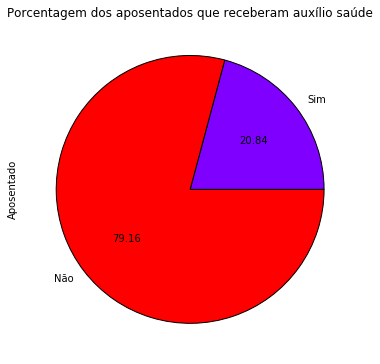

In [170]:
tcas.Aposentado.plot.pie(title= 'Porcentagem dos aposentados que receberam auxílio saúde', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

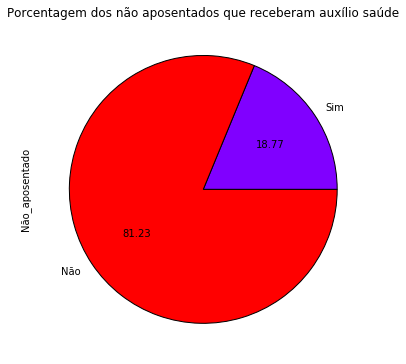

In [171]:
tcas.Não_aposentado.plot.pie(title= 'Porcentagem dos não aposentados que receberam auxílio saúde', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

    Por fim, a variável auxílio saúde

In [207]:
# Renda per-capita
dados.V4720 = dados.V4720.astype('float')
dados.V4720 = dados[dados.V4720 != 999999999999]

In [208]:
rendaap = dados[(dados.V9122 == 'Aposentado') & (~dados.V4720.isnull())]


In [210]:
rendaapf = rendaap.V4720
rendaapf

5         2014
11        2014
25        2014
26        2014
51        2014
62        2014
66        2014
77        2014
82        2014
87        2014
88        2014
98        2014
103       2014
138       2014
183       2014
195       2014
197       2014
198       2014
213       2014
232       2014
257       2014
267       2014
280       2014
281       2014
372       2014
373       2014
374       2014
375       2014
382       2014
383       2014
          ... 
361904    2014
361909    2014
361974    2014
361978    2014
361982    2014
362016    2014
362024    2014
362059    2014
362063    2014
362077    2014
362080    2014
362095    2014
362105    2014
362108    2014
362120    2014
362165    2014
362194    2014
362202    2014
362218    2014
362239    2014
362344    2014
362369    2014
362436    2014
362441    2014
362450    2014
362470    2014
362542    2014
362547    2014
362549    2014
362555    2014
Name: V4720, dtype: object

In [202]:
rendaapf.describe()

count     38643
unique        1
top        2014
freq      38643
Name: V4750, dtype: int64

In [174]:
rendaap = dados[(dados.V9122 == 2) & (dados.V4750)]
faixas_rendaap = range(0,20000, 1000)
classe = pd.cut(rendaap, faixas_rendaap)
classe.value_counts()

ValueError: object too deep for desired array

In [ ]:
dados.boxplot(column= dados[(dados.V8005 >= 60)].V9044, by="UF", figsize=(10, 10))

    A variável acima mostra que 

In [ ]:
# Possuir ou não celular
print("Porcentagem de idosos que possuem ou não celular")
celularidosos = (dados[(dados.V8005 >= 60)].V060112.value_counts()/n*100).round(decimals=1)
print(celularidosos,'\n')
celularidososbarr = celularidosos.plot(kind='bar',title='Frequência de idosos que possuem ou não celular (%)',figsize=(6, 6),color=('b','g'))

print("Porcentagem da população que possui ou não celular")
celularpopulacao = (dados[(dados.V8005 < 60)].V060112.value_counts()/n*100).round(decimals=1)
print(celularpopulacao,'\n')
celularpopulacaobarr = celularpopulacao.plot(kind='bar',title='Frequência da população que possui ou não celular (%)',figsize=(6, 6),color=('b','g'))


    Essa variável, que segue o mesmo cerne da comunicação, mostra que 

In [ ]:
# Acessou a internet no último ano
print("Porcentagem de idosos que acessou a internet no último ano")
internetidosos = (dados[(dados.V8005 >= 60)].V0601111.value_counts()/n*100).round(decimals=1)
print(internetidosos,'\n')
internetidososbarr = internetidosos.plot(kind='bar',title='Frequência de idosos que acessaram a internet no último ano (%)',figsize=(6, 6),color=('b','g'))

print("Porcentagem da população que acessou a internet no último ano")
internetpopulacao = (dados[(dados.V8005 < 60)].V0601111.value_counts()/n*100).round(decimals=1)
print(internetpopulacao,'\n')
internetpopulacaobarr = internetpopulacao.plot(kind='bar',title='Frequência da população que acessou a internet no último ano (%)',figsize=(6, 6),color=('b','g'))


    Co-relacionado a variável anterior, esta demonstra que